# Enter Student Name & ID

In [ ]:
student_id =400101872   #@param {type:"integer"}
student_name = "Matin Mohamadghasemi" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [3]:
import numpy as np

In [17]:
def myPCA(X, num_components):


    # Step 1: Mean center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Step 2: Calculate the covariance matrix
    cov_matrix = np.dot(X_centered.T, X_centered) / (X_centered.shape[0] - 1)
    
    # Step 3: Calculate eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Step 4: Sort eigenvalues and their corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 5: Select a subset of the eigenvectors (principal components)
    principal_components = eigenvectors[:, :num_components]
    
    # Step 6: Transform the data onto the new feature space
    X_reduced = np.dot(X_centered, principal_components)
    
    return X_reduced

# Example usage
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2.0, 1.6],
              [1.0, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

num_components = 2
X_reduced = myPCA_alternative(X, num_components)
print(X_reduced)


    return 

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

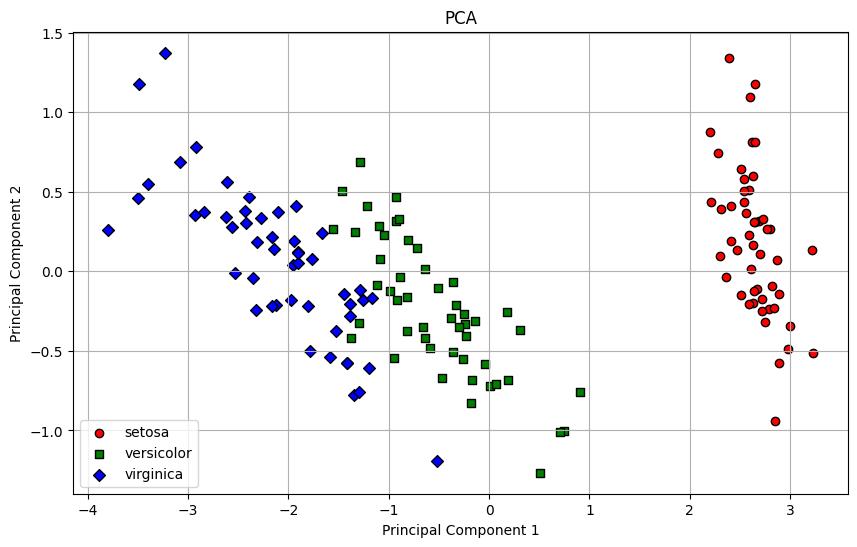

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
labels = iris.target_names

for i, color, marker, label in zip(np.unique(y), colors, markers, labels):
    plt.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1],
                color=color, label=label, marker=marker, edgecolor='k')

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are a set of eigenvectors utilized in the computer vision task of human face recognition. They are obtained from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. Here’s a comprehensive explanation of eigenfaces and their connection to PCA:

An eigenface is a standardized face created from the average of many facial images. It is an eigenvector of the covariance matrix of the facial image set. Each eigenface captures specific features of faces, such as broad areas of light and dark that correspond to facial structures like the eyes, nose, and mouth.

Applying PCA to face images extracts the principal components, known as eigenfaces in face recognition. The first few principal components (eigenfaces) capture the most variance in the data, representing the most significant facial features. By projecting face images onto the subspace defined by these eigenfaces, we can reduce the dimensionality of the data while retaining crucial features for face recognition.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [21]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    return [cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
            for filename in os.listdir(folder) if cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE) is not None]

def prepare_data(data_path, train_size=0.5):
    X_train, y_train, X_test, y_test = [], [], [], []
    
    for label, person_folder in enumerate(sorted(os.listdir(data_path))):
        folder_path = os.path.join(data_path, person_folder)
        images = load_images_from_folder(folder_path)
        
        split_point = int(len(images) * train_size)
        
        X_train.extend([img.flatten() for img in images[:split_point]])
        y_train.extend([label] * split_point)
        
        X_test.extend([img.flatten() for img in images[split_point:]])
        y_test.extend([label] * (len(images) - split_point))
    
    return (np.array(X_train), np.array(y_train)), (np.array(X_test), np.array(y_test))

data_path = 'ORL'
(X_train, y_train), (X_test, y_test) = prepare_data(data_path)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (200, 2304)
Test data shape: (200, 2304)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [26]:
from sklearn.decomposition import IncrementalPCA

num_components = 50
ipca = IncrementalPCA(n_components=num_components, batch_size=10)

X_train_ipca = ipca.fit_transform(X_train)
X_test_ipca = ipca.transform(X_test)

print("New training data shape:", X_train_ipca.shape)
print("New test data shape:", X_test_ipca.shape)


New training data shape: (200, 50)
New test data shape: (200, 50)


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.91


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of components: 40, Accuracy: 0.92
Number of components: 50, Accuracy: 0.915
Number of components: 60, Accuracy: 0.91
Number of components: 70, Accuracy: 0.915
Number of components: 80, Accuracy: 0.925
Number of components: 90, Accuracy: 0.935
Number of components: 100, Accuracy: 0.925


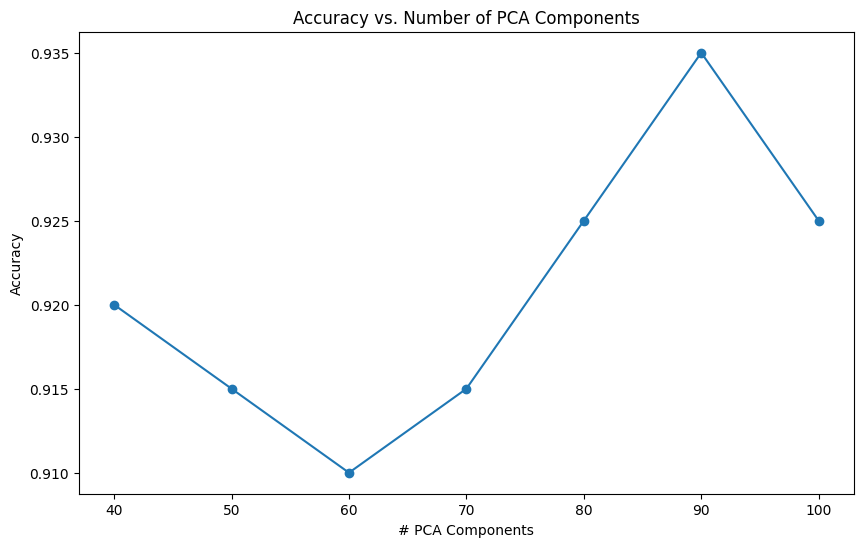

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

pca_dimensions = list(range(40, 101, 10))
accuracies = []

for num_components in pca_dimensions:
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    y_pred = lda.predict(X_test_pca)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Number of components: {num_components}, Accuracy: {accuracy} ")

plt.figure(figsize=(10, 6))
plt.plot(pca_dimensions, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('# PCA Components')
plt.ylabel('Accuracy')
plt.show()



The classifier's accuracy can vary notably depending on the number of PCA components utilized. Employing an insufficient number of components may result in underfitting due to potential loss of critical information. Conversely, employing an excessive number of components might not yield substantial accuracy gains and could escalate computational overhead. By analyzing the plotted outcomes, we can ascertain the ideal number of components that strike a balance between reducing dimensionality and enhancing classification accuracy.

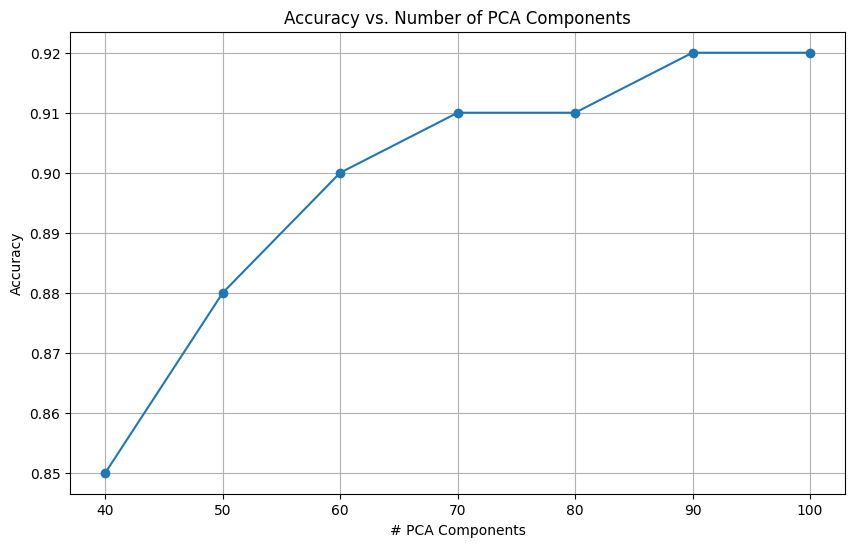

Optimal number of PCA components: 50


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
# If not, you'll need to load and split your dataset accordingly

pca_dimensions = range(40, 101, 10)
accuracies = []

for num_components in pca_dimensions:
    # Apply PCA
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Apply LDA
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    y_pred = lda.predict(X_test_pca)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Number of components: {num_components}, Accuracy: {accuracy}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(pca_dimensions, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('# PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Determine the optimal number of components
optimal_index = np.argmax(accuracies)
optimal_components = pca_dimensions[optimal_index]

print(f"Optimal number of PCA components: {optimal_components}")



Approximately 50 components appear to offer the optimal solution for this face recognition task. This determination stems from achieving an equilibrium between computational efficiency and classification accuracy.